
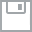
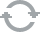
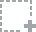
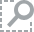
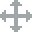
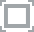
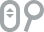
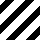
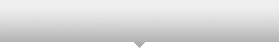
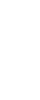
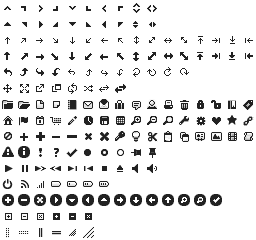
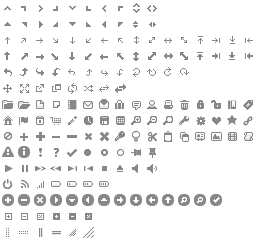
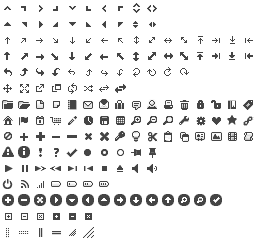
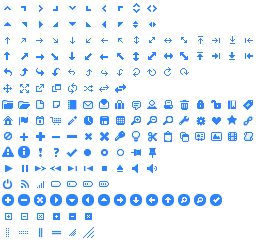
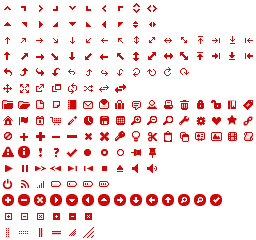
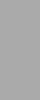
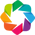
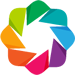

In [3]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze
from datascienceutils import predictiveModels as pm
from datascienceutils import sklearnUtils as sku

from IPython.display import Image
# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random

from sklearn import cross_validation
from sklearn import metrics

from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook()

# Set pandas display options
#pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)


In [6]:
# Data set from https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/
columns = ['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 
           'big_liver', 'firm_liver', 'palpable_spleen', 'spiders', 'ascites', 'varices', 'bilirubin',
          'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology']

hepatitis_df = pd.read_csv('~/DataScientist/data/Hepatitis/hepatitis.data', names=columns, na_values=['?'])
    


In [9]:
from pprint import pprint
import os
with open(os.path.expanduser('~/DataScientist/data/Hepatitis/hepatitis.names'), 'r') as fd:
    pprint(fd.readlines())

['1. Title: Hepatitis Domain\n',
 '\n',
 '2. Sources:\n',
 '     (a) unknown\n',
 '     (b) Donor: G.Gong  (Carnegie-Mellon University) via \n',
 '                   Bojan Cestnik\n',
 '                   Jozef Stefan Institute\n',
 '                   Jamova 39\n',
 '                   61000 Ljubljana\n',
 '                   Yugoslavia (tel.: (38)(+61) 214-399 ext.287) }\n',
 '     (c) Date: November, 1988\n',
 '\n',
 '3. Past Usage:\n',
 '    1. Diaconis,P. & Efron,B. (1983).  Computer-Intensive Methods in \n',
 '       Statistics.  Scientific American, Volume 248.\n',
 '       -- Gail Gong reported a 80% classfication accuracy\n',
 '    2. Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A\n',
 '       Knowledge-Elicitation Tool for Sophisticated Users.  In I.Bratko\n',
 '       & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.\n',
 '       -- Assistant-86: 83% accuracy\n',
 '\n',
 '4. Relevant Information:\n',
 '    Please ask Gail Gong for further info

In [10]:
hepatitis_df.head()


class  age  sex  steroid  antivirals  fatigue  malaise  anorexia  big_liver  firm_liver  palpable_spleen  spiders  ascites  varices  bilirubin  alk_phosphate   sgot  albumin  protime  histology
0      2   30    2      1.0           2      2.0      2.0       2.0        1.0         2.0              2.0      2.0      2.0      2.0        1.0           85.0   18.0      4.0      NaN          1
1      2   50    1      1.0           2      1.0      2.0       2.0        1.0         2.0              2.0      2.0      2.0      2.0        0.9          135.0   42.0      3.5      NaN          1
2      2   78    1      2.0           2      1.0      2.0       2.0        2.0         2.0              2.0      2.0      2.0      2.0        0.7           96.0   32.0      4.0      NaN          1
3      2   31    1      NaN           1      2.0      2.0       2.0        2.0         2.0              2.0      2.0      2.0      2.0        0.7           46.0   52.0      4.0     80.0          1
4      2   34    1      2.0           2      2.0      2.0       2.0        2.0         2.0              2.0      2.0      2.0      2.0        1.0            NaN  200.0      4.0      NaN          1

/home/anand/playspace/data-science-utils/.eggs/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/anand/playspace/data-science-utils/.eggs/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/anand/playspace/data-science-utils/.eggs/statsmodels-0.8.0-py3.6-linux-x86_64.egg/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])


# Correlation btw Numerical Columns


/home/anand/anaconda3/envs/analytics/lib/python3.6/site-packages/matplotlib/contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/anand/anaconda3/envs/analytics/lib/python3.6/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


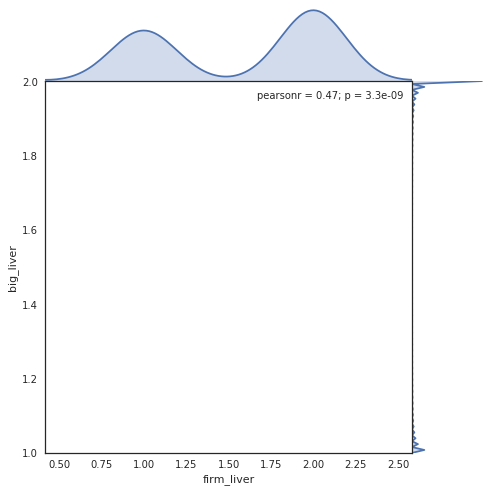

In [12]:
analyze.correlation_analyze(hepatitis_df, 'firm_liver', 'big_liver')

In [19]:
hepatitis_df.big_liver.replace(np.inf, 9999999, inplace=True)
hepatitis_df.big_liver.replace(-np.inf, -9999999, inplace=True)

analyze.dist_analyze(hepatitis_df, 'big_liver')

Variance of big_liver
0.14367816092
Skewness of big_liver
-1.7526378546
Kolmogrov - Smirnov test with distribution norm
KstestResult(statistic=nan, pvalue=nan)
Anderson-Darling normality test on big_liver 
Statistic: nan 
 p-value: 0.000000



/home/anand/anaconda3/envs/analytics/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/anand/anaconda3/envs/analytics/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/anand/anaconda3/envs/analytics/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/home/anand/anaconda3/envs/analytics/lib/python3.6/site-packages/bokeh/charts/stats.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  self.bin_count = np.ceil((self.values.max() - self.values.min())/self.bin_width)


OverflowError: cannot convert float infinity to integer

In [20]:
hepatitis_df.big_liver.any(lambda x: x==np.inf)

ValueError: No axis named <function <lambda> at 0x7f6d4ea48ea0> for object type <class 'pandas.core.series.Series'>